In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#machine learning libraries

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
#the date columns converted into category.so we have to convert it bact to date time format using .to_datetime

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
#to see all the values with object datatype

In [11]:
df.select_dtypes(['object'])

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,PI,Jas,Maribyrnong City Council,Western Metropolitan
34853,Yarraville,29A Murray St,h,SP,Sweeney,Maribyrnong City Council,Western Metropolitan
34854,Yarraville,147A Severn St,t,S,Jas,Maribyrnong City Council,Western Metropolitan
34855,Yarraville,12/37 Stephen St,h,SP,hockingstuart,Maribyrnong City Council,Western Metropolitan


In [12]:
#object datatypes column names

In [13]:
df.select_dtypes(['object']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [14]:
#to convert the objects to Categories using .astype() method

In [15]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for i in obj_cats:
    df[i] = df[i].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [18]:
#.describe() will give us the statistical information of each column

In [19]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [21]:
#in this dataset there is 2 columns bedroom2 and rooms,we have to check wheather the columns giving the same information

In [22]:
df['Rooms vs Bedroom2'] = df['Rooms'] - df['Bedroom2']

In [23]:
df['Rooms vs Bedroom2'].unique()

array([  0.,   1.,  -2.,  -1.,  nan,   2.,  -3.,   3., -27.,   4.,  -5.,
        -6., -17.,   8.,  -7.])

In [24]:
df['Rooms vs Bedroom2'].value_counts()

 0.0     25692
 1.0       569
-1.0       248
 2.0        77
-2.0        23
 3.0        18
 4.0         4
-6.0         2
-3.0         2
-7.0         1
-17.0        1
-27.0        1
-5.0         1
 8.0         1
Name: Rooms vs Bedroom2, dtype: int64

In [25]:
df = df.drop(['Bedroom2','Rooms vs Bedroom2'], axis=1)

In [26]:
#in the column yearbuilt, there is wrong data entry , because year 2106 is not available as of now. so we have to replace it

In [27]:
df['YearBuilt'].max() 

2106.0

In [28]:
df['YearBuilt'].drop_duplicates().reset_index().sort_values(by='YearBuilt', ascending=False).head() # This is called chaining

,index,YearBuilt
97,2453,2106.0
159,33033,2019.0
95,2096,2018.0
64,750,2017.0
20,66,2016.0


In [29]:
df['YearBuilt'].replace(2106.0,2019.0, inplace = True)

In [30]:
df['YearBuilt'].max()

2019.0

In [31]:
#to find the age of the building

In [32]:
df['Age'] = df['YearBuilt'].max() - df['YearBuilt']

In [33]:
df['Historic'] = np.where(df['Age'] >= 50, 'Historic', 'Contempory' )

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

In [35]:
df['Historic'] = df['Historic'].astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

In [37]:
#to find the null values in the data

In [38]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

In [39]:
#to find the percentage

In [40]:
df.isnull().sum()/len(df) * 100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

In [41]:
 #using heatmap

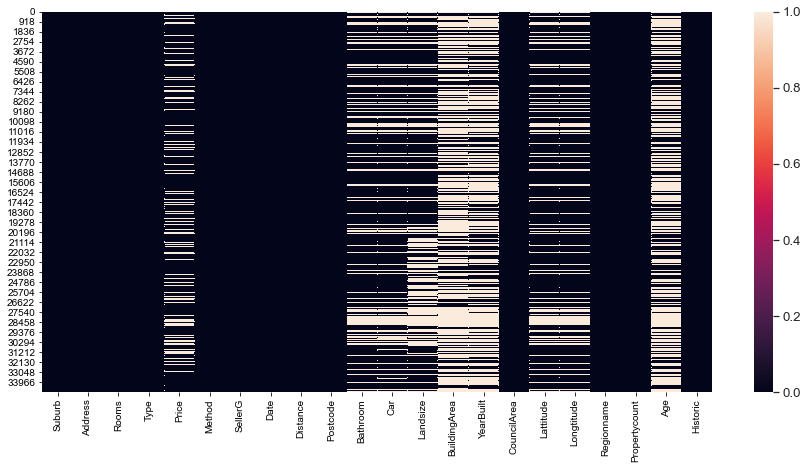

In [42]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull())
plt.show()

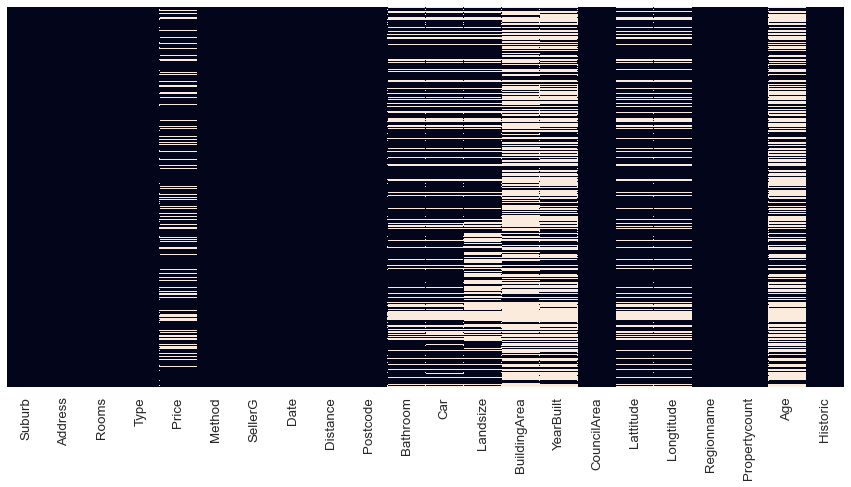

In [43]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [44]:
df = df[df['BuildingArea'] != 0]

In [45]:
 #filling the null values 

In [46]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Car'] = df['Car'].fillna(df['Car'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())


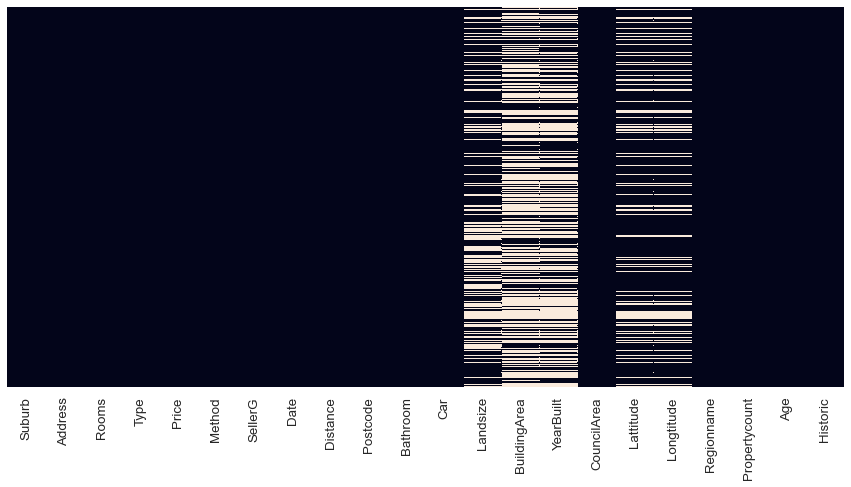

In [47]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [48]:
#training the model

In [49]:
X = df[['Rooms', 'Bathroom', 'Age']]

In [50]:
y = df['Price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<AxesSubplot:>

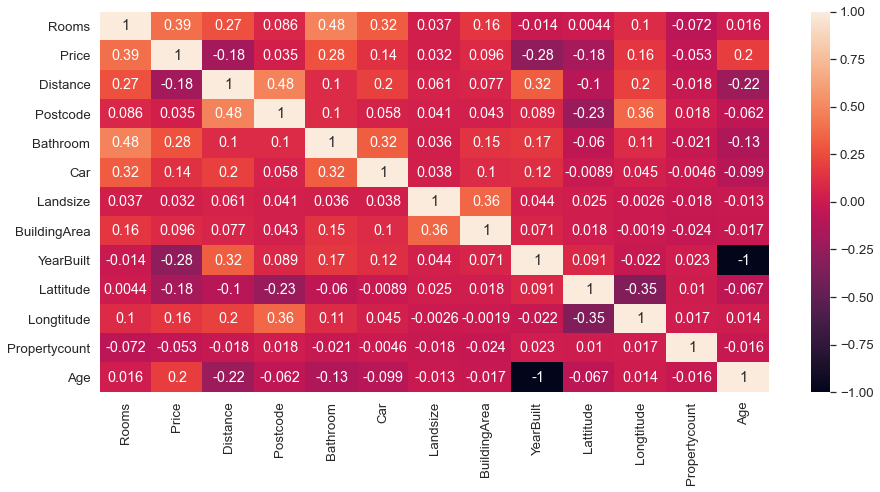

In [53]:
#to ind the correlation 
plt.subplots(figsize = (15,7))
sns.heatmap(df.corr(), annot = True)


In [54]:
#calling the linear model
lr = LinearRegression()

In [55]:
#fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
#predicting the testing value
y_pred = lr.predict(X_test)

In [57]:
#to find the accuracy
metrics.r2_score(y_test, y_pred)

0.2018489035351455